# Model Validation

## Importar librerías necesarias

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut, validation_curve, learning_curve, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [4]:
# Cargar el dataset de iris
iris = load_iris()
X = iris.data
y = iris.target

# Validación incorrecta del modelo
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X, y)
y_model = model.predict(X)
print("Precisión con validación incorrecta:", accuracy_score(y, y_model))

# División de datos en entrenamiento y prueba
X1, X2, y1, y2 = train_test_split(X, y, random_state=0, train_size=0.5)
model.fit(X1, y1)
y2_model = model.predict(X2)
print("Precisión con holdout set:", accuracy_score(y2, y2_model))

# Validación cruzada con 2 trials
y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)
print("Precisión con 2 trials:", accuracy_score(y1, y1_model), accuracy_score(y2, y2_model))

# Validación cruzada con 5 folds
scores = cross_val_score(model, X, y, cv=5)
print("Precisión con 5-fold cross-validation:", scores)

# Validación cruzada con Leave-One-Out
scores = cross_val_score(model, X, y, cv=LeaveOneOut())
print("Precisión con Leave-One-Out:", scores.mean())

# Crear datos para regresión polinomial
def make_data(N, err=1.0, rseed=1):
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

# Función para regresión polinomial
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

Precisión con validación incorrecta: 1.0
Precisión con holdout set: 0.9066666666666666
Precisión con 2 trials: 0.96 0.9066666666666666
Precisión con 5-fold cross-validation: [0.96666667 0.96666667 0.93333333 0.93333333 1.        ]
Precisión con Leave-One-Out: 0.96


## Visualizar datos y ajustes polinomiales

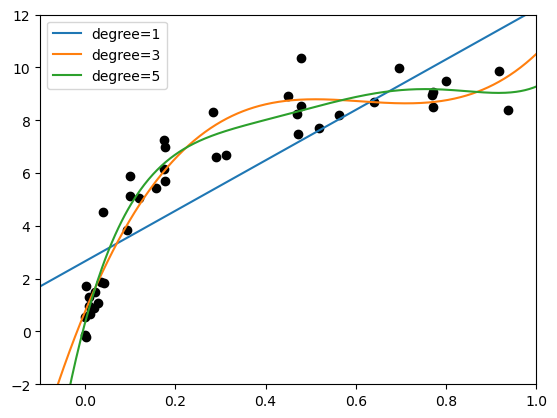

In [6]:
X_test = np.linspace(-0.1, 1.1, 500)[:, None]
plt.scatter(X.ravel(), y, color='black')
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best')

## Curva de validación

Text(0, 0.5, 'score')

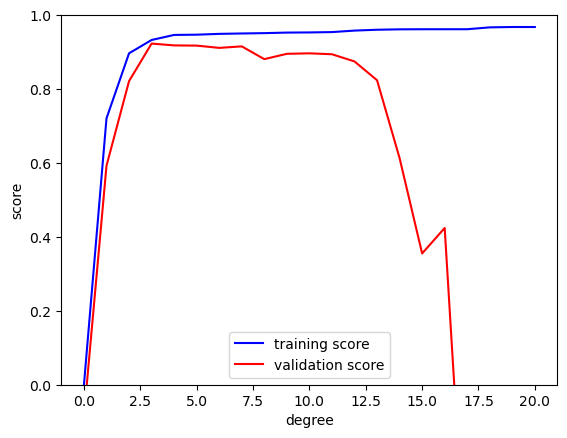

In [8]:
degree = np.arange(0, 21)
train_score, val_score = validation_curve(make_pipeline(PolynomialFeatures(), LinearRegression()), X, y, param_name='polynomialfeatures__degree', param_range=degree, cv=7)
plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score')

## Ajuste óptimo con polinomio de grado 3

(-0.04687651021505175,
 0.9844070023112612,
 -0.7308177116555796,
 10.902869392322714)

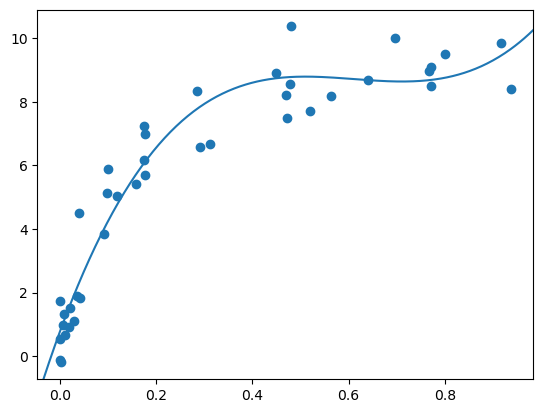

In [10]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test)
plt.axis(lim)

## Crear más datos para regresión polinomial

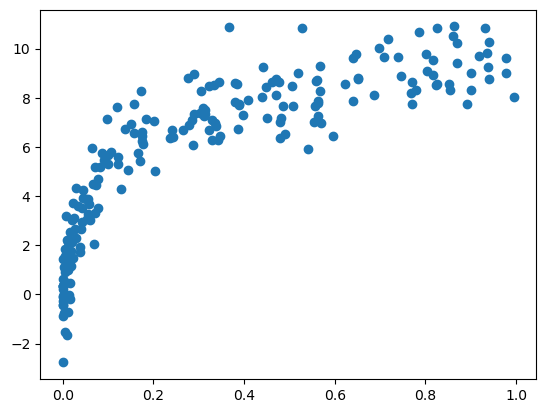

In [12]:
X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2)

## Curva de aprendizaje

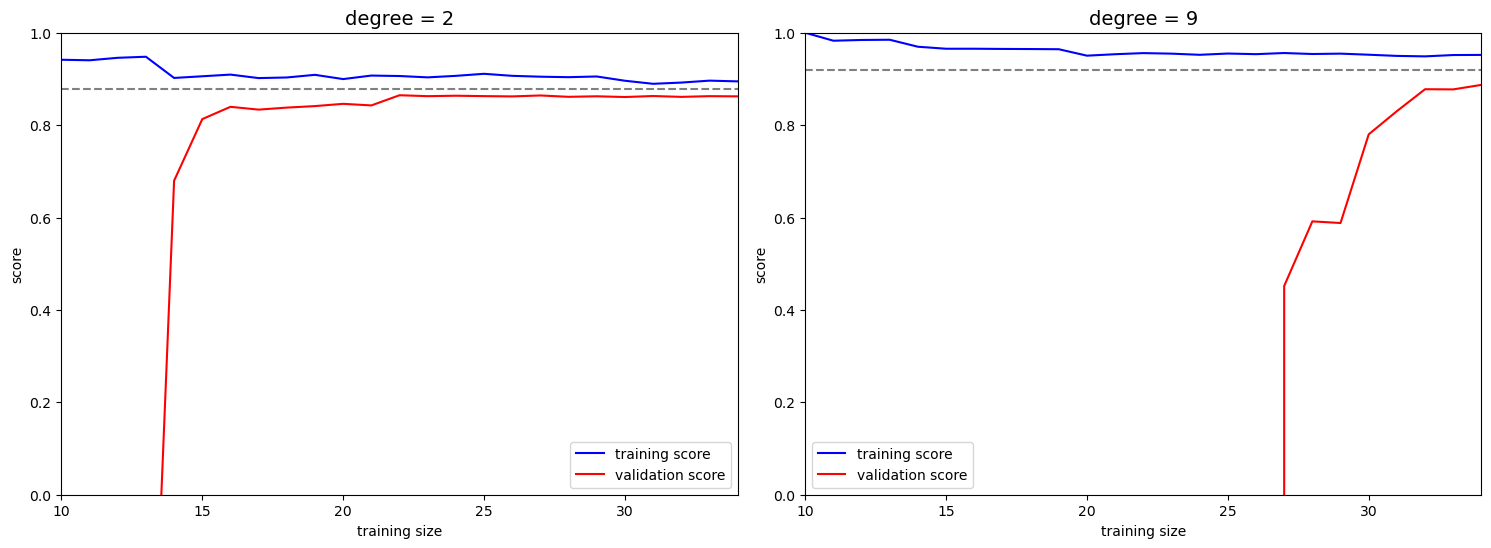

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree), X, y, cv=7, train_sizes=np.linspace(0.3, 1, 25))
    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1], color='gray', linestyle='dashed')
    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')